# Notebook TP 1¶

You will use this notebook to answer the exercises. You can add text (markdown) or code cells as you see fit.

In this first session, we take control of the software: we play with the notion of numerical approximation of a derivative. We also experiment the visualizing methods of two variable functions (graph and isovalues)




Type in this cell the number of the team and the names of the participating students:

### BEGIN SOLUTION

### END SOLUTION


# Numerical Approximation of a derivative

The aim of the exercise is to verify the numerical precision of
two approximations by finite differences
of the derivative of a function 
$$
(1)\quad\quad f'(x)\approx \frac{f(x+h)-f(x)}{h}$$
$$
(2)\quad\quad f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}.$$

Calculate the order of the error made by approximating the derivative by these approximations for $ h \neq 0 $. 

### BEGIN SOLUTION

### END SOLUTION

In a code cell, load the libraries  numpy, math and matplotlib 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline   
# this command show plots in the notebook

Program a function  $f(x)$ returning the value of $\sin(x)$ and a function $fprime(x)$ returning its derivative. Use $numpy$ trigonometric functions


In [2]:
### BEGIN SOLUTION
def f(x):
    return np.sin(x)
def fprime(x):
    return np.cos(x)
### END SOLUTION

Define the variables
$h=0.1$, the number of visualization points $n$ and  a vector of abscissa $x$ in order to discretize the interval
 $[0,\pi]$, $x_i=i \pi/n$, $i=0,\ldots,n$ (use  numpy command : linspace).

In [3]:
### BEGIN SOLUTION
h=0.1
n=100
x=np.linspace(0,np.pi,n+1)
### END SOLUTION

Compute (without $for$ loop) in a numpy array $d$ the exact derivative of the function $f$ at points $x$ and in an array $d1$ the approximated values with the  formula (1) above

In [4]:
### BEGIN SOLUTION
d=fprime(x)
d1=(f(x+h)-f(x))/h
### END SOLUTION

Represent both $d$ and $d1$ in the same graph, with a legend and axis labels


Text(0.5, 1.0, 'approximation of derivative of f(x)=sin(x)')

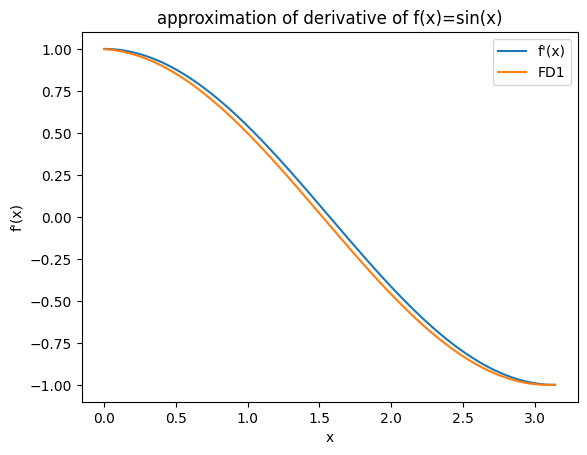

In [5]:
### BEGIN SOLUTION
plt.plot(x,d,label="f'(x)")
plt.plot(x,d1,label="FD1")
plt.legend(loc=1)
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("approximation of derivative of f(x)=sin(x)")
### END SOLUTION

Compute the maximal error 
$$e_1=\displaystyle\max_{i=1,n}|d1_i-d_i|$$
using this approximation in the
 $[0,\pi]$ interval (use  numpy.linalg.norm comand). 

Print the result

In [6]:
### BEGIN SOLUTION
e1=np.linalg.norm(d-d1,np.inf)
print('max error d1 is ',e1,' for h=',h)
### END SOLUTION

max error d1 is  0.049986020886891296  for h= 0.1


Do it again with a smaller $h=0.01$.  To answer this question copy-paste all the necessary commands in the following cell

In [7]:
### BEGIN SOLUTION
h=0.01
d1=(f(x+h)-f(x))/h
e1=np.linalg.norm(d-d1,np.inf)
print('max error with d1 approximation is ',e1,' for h=',h)
### END SOLUTION


max error with d1 approximation is  0.004999958333473504  for h= 0.01


What do you notice ?
### BEGIN SOLUTION
By dividing $h$ by 10, the error has been divided by 10.
### END SOLUTION

Now we are going to compare the two approximations (1) and (2).

Compute the approximation in an array $d2$.

Be careful to compute both approximations for the same value $h=0.1$ (which you may have changed recently). 


In [8]:
### BEGIN SOLUTION
h=0.1
d1=(f(x+h)-f(x))/h
e1=np.linalg.norm(d-d1,np.inf)
d2=(f(x+h)-f(x-h))/(2*h)
e2=np.linalg.norm(d-d2,np.inf)
print('max error with d1 approximation is ',e1,' for h=',h,'\nmax error with d2 approximation is ',e2,' for h=',h)

### END SOLUTION


max error with d1 approximation is  0.049986020886891296  for h= 0.1 
max error with d2 approximation is  0.0016658335317184525  for h= 0.1


Represent $d$,  $d1$ and $d2$ in the same graph, with a legend and axis labels. Be careful to compute both approximations for the same value $h=0.1$ (which you may have changed recently). Plot the $d2$ approximation with a dotted line

 

Text(0.5, 1.0, 'approximation of derivative of f(x)=sin(x)')

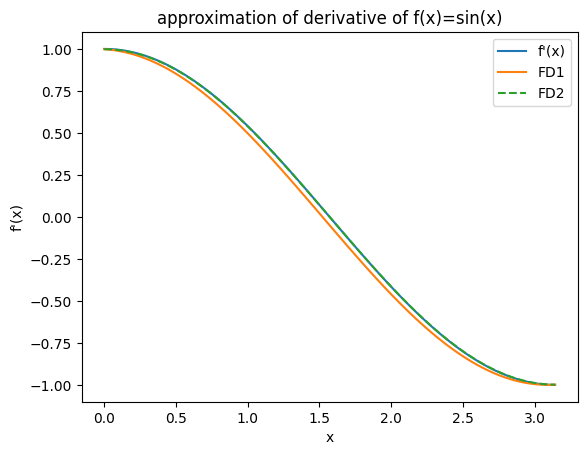

In [9]:
### BEGIN SOLUTION
plt.plot(x,d,label="f'(x)")
plt.plot(x,d1,label="FD1")
plt.plot(x,d2,'--',label="FD2")
plt.legend(loc=1)
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("approximation of derivative of f(x)=sin(x)")
### END SOLUTION

Interprate the graph:
### BEGIN SOLUTION
The second order approximation $d2$ is much more precise than the first order one. Therefore for a not so small value of $h=0.1$, the $d1$ approximation is far for the exact value  but the $d2$ approximation is already not distinguishable from the exact value.
### END SOLUTION


Define a function $max\_error$ with input parameter $h$ and return values
the maximal errors between the two approximations and the exact derivative. 

In [10]:
### BEGIN SOLUTION
def max_error(h):
    d1=(f(x+h)-f(x))/h
    e1=np.linalg.norm(d-d1,np.inf)
    d2=(f(x+h)-f(x-h))/(2*h)
    e2=np.linalg.norm(d-d2,np.inf)
    return e1,e2
### END SOLUTION

Test the function $max\_error$ on several values of $h=0.1$, $0.001$, $1O^{-5}$.

In [11]:
### BEGIN SOLUTION
for h in [0.1,0.001,0.00001]:
    e=max_error(h)
    print('for h=',h,' e_1=',e[0],' e_2=',e[1])
### END SOLUTION

for h= 0.1  e_1= 0.049986020886891296  e_2= 0.0016658335317184525
for h= 0.001  e_1= 0.0004999999583253425  e_2= 1.6666676849741435e-07
for h= 1e-05  e_1= 5.000000413541042e-06  e_2= 2.266775656067921e-11


Define an array $H$ containing increasing values between $10^{-10}$ and
$0.1$ (use  numpy command  logspace). 

In [12]:
### BEGIN SOLUTION
H=np.logspace(-10,-1)
### END SOLUTION

Compute the errors for the $H$ values into two lists $E1$ and $E2$

In [13]:
### BEGIN SOLUTION
E1=[]
E2=[]
for h in H:
    e=max_error(h)
    E1.append(e[0])
    E2.append(e[1])
### END SOLUTION

Plot the graph of $E1$ and $E2$ versus $H$ in logarithmic coordinates (pyplot commands xscale and yscale).  
Plot the theoretical trends of the errors $h$ versus $h$ and $h^2$ versus $h$ on the same graph.

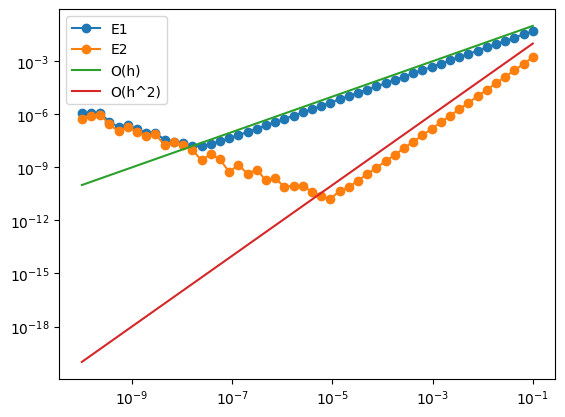

In [14]:
### BEGIN SOLUTION
plt.plot(H,E1,"-o",label="E1")
plt.plot(H,E2,"-o",label="E2")
plt.plot(H,H,"-",label="O(h)")
plt.plot(H,H**2,"-",label="O(h^2)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
### END SOLUTION

Interpret the graph. Do you recover the expected order of convergence ? Why do the numerical error increase again when $h\rightarrow 0$ ?
### BEGIN SOLUTION
In the right part of the graph
the error $e1$ is parallel to the curve $h$ and the error $e2$ is parallel to the $h^2$ curve. Therefore the orders of convergence are well recovered. However when $h$ goes to 0, for very small values, the two errors  increase instead of decreasing.

This phenomenon is due to numerical precision : for $h$ very small $f(x+h)-f(x)$ returns the smallest float number that the computer can represent. Lets call it $Z$ (for "numerical zero"). Then we have
$$d_1(h)=\dfrac{f(x+h)-f(x)}{h}\approx\dfrac{Z}{h}$$ and in logarithmic scale
$$\log(d_1(h))=\log(Z)-\log(h).$$
Hence the -1 slope for this part of the $e_1$ curve.

For the second order approximation, we get :
$$d_2(h)=\dfrac{f(x+h)-f(x-h)}{2h}\approx\dfrac{Z}{2h}$$ and in logarithmic scale
$$\log(d_2(h))=\log(Z/2)-\log(h).$$
Hence for this part of the $e_2$ curve, the slope is also -1.

### END SOLUTION

We are now going to explore what happens for functions which are less smooth than $\sin(x)$


You will draw the same graphs as above  for each of the 2 functions below. 
After defining the functions $f(x)$ and $fprime(x)$
you need to think which computations need to be perform and copy-paste the  python commands in the correct order.

$$ f_1(x)=\left\{\begin{array}{l}
-(x-\pi/6)^4 \mbox{ if }x<\pi/6\\
(x-\pi/6)^4\mbox{ otherwise}
\end{array}\right.\mbox{ on }[0,\pi/2]
$$

$$ f_2(x)=\left\{\begin{array}{l}
-(x-\pi/6)^2 \mbox{ if }x<\pi/6\\
(x-\pi/6)^2\mbox{ otherwise}
\end{array}\right.\mbox{ on }[0,\pi/2]
$$

$$ f_3(x)=\left\{\begin{array}{l}
-x+\pi/6 \mbox{ if }x<\pi/6\\
x-\pi/6\mbox{ otherwise}
\end{array}\right.\mbox{ on }[0,\pi/2]
$$


Programming hints : to find out which components of the $x$ numpy array are negative, you can use numpy function $np.where$. For instance

$p=np.where(x<0)$

To assign 1 to a numpy array $y$ of the same shape $x$ you can use numpy function $np.ones\_like$. For instance

$y=np.ones\_like(x)$

To assign 1 to a set $p$ of indices in an array $y$ you can use numpy function $np.ones\_like$. For instance

$y[p]=np.ones\_like(p)$

Program functions $f(x)$ and $fprime(x)$ for case 1

In [15]:
### BEGIN SOLUTION
def f(x):
    y=(x-np.pi/6)**4
    p=np.where(x<np.pi/6)
    y[p]=-(x[p]-np.pi/6)**4
    return y
def fprime(x):
    y=4*(x-np.pi/6)**3
    p=np.where(x<np.pi/6)
    y[p]=-4*(x[p]-np.pi/6)**3
    return y
### END SOLUTION
   

Draw the exact and approximative derivatives on $[0,\pi/2]$ for $h=0.1$ 

Text(0.5, 1.0, 'approximation of derivative of f_1(x)')

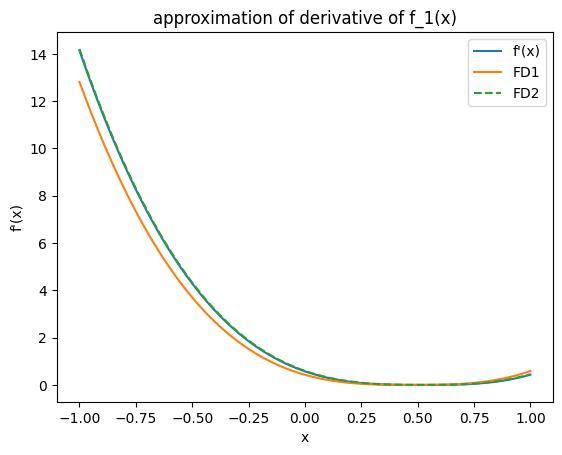

In [16]:
### BEGIN SOLUTION

n=100
x=np.linspace(-1,1,n+1)
h=0.1
d=fprime(x)
d1=(f(x+h)-f(x))/h
e1=np.linalg.norm(d-d1,np.inf)
d2=(f(x+h)-f(x-h))/(2*h)
e2=np.linalg.norm(d-d2,np.inf)
plt.plot(x,d,label="f'(x)")
plt.plot(x,d1,label="FD1")
plt.plot(x,d2,'--',label="FD2")
plt.legend(loc=1)
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("approximation of derivative of f_1(x)")
### END SOLUTION


Draw the error graph

Text(0.5, 1.0, 'error graph for approximation of derivative of f_1')

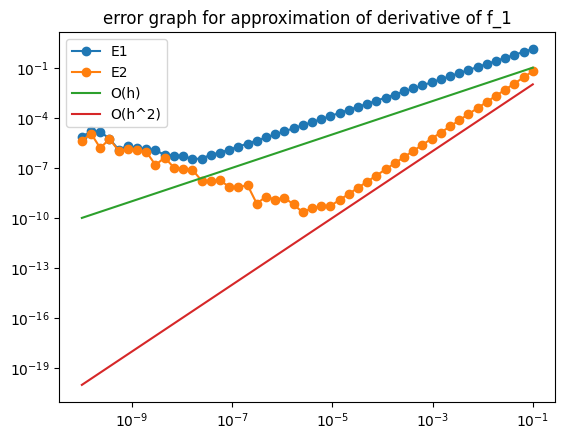

In [17]:
### BEGIN SOLUTION
E1=[]
E2=[]
for h in H:
    e=max_error(h)
    E1.append(e[0])
    E2.append(e[1])
plt.plot(H,E1,"-o",label="E1")
plt.plot(H,E2,"-o",label="E2")
plt.plot(H,H,"-",label="O(h)")
plt.plot(H,H**2,"-",label="O(h^2)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('error graph for approximation of derivative of f_1')
### END SOLUTION


Interpret the two graphs
### BEGIN SOLUTION
We get the same behavior as for function $f(x)=\sin(x)$ because $f_1(x)$ is of class $C^3$ therefore the second order approximation is still functionning correctly
### END SOLUTION


Program functions $f(x)$ and $fprime(x)$ for case 2

In [18]:
### BEGIN SOLUTION
def f(x):
    y=(x-np.pi/6)**2
    p=np.where(x<np.pi/6)
    y[p]=-(x[p]-np.pi/6)**2
    return y
def fprime(x):
    y=2*(x-np.pi/6)
    p=np.where(x<np.pi/6)
    y[p]=-2*(x[p]-np.pi/6)
    return y
### END SOLUTION


Draw the exact and approximative derivatives on $[0,\pi/2]$ for $h=0.1$ 

Text(0.5, 1.0, 'approximation of derivative of f_2(x)')

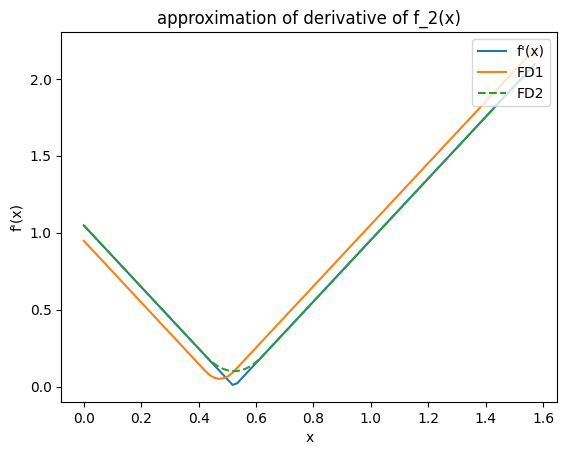

In [19]:
### BEGIN SOLUTION
h=0.1
n=100
x=np.linspace(0,np.pi/2,n+1)
d=fprime(x)
d1=(f(x+h)-f(x))/h
e1=np.linalg.norm(d-d1,np.inf)
d2=(f(x+h)-f(x-h))/(2*h)
e2=np.linalg.norm(d-d2,np.inf)
plt.plot(x,d,label="f'(x)")
plt.plot(x,d1,label="FD1")
plt.plot(x,d2,'--',label="FD2")
plt.legend(loc=1)
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("approximation of derivative of f_2(x)")
### END SOLUTION


Draw the error graph

Text(0.5, 1.0, 'error graph for approximation of derivative of f_2')

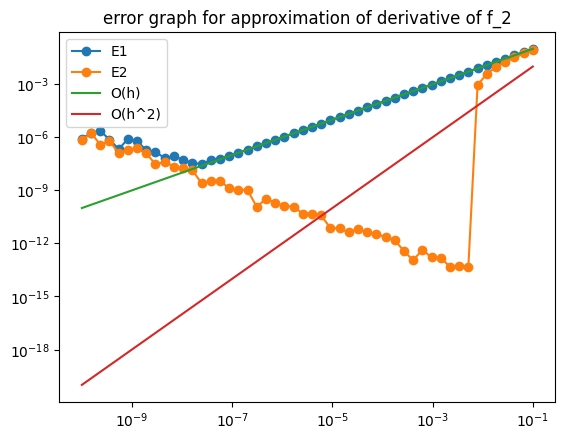

In [20]:
### BEGIN SOLUTION
E1=[]
E2=[]
for h in H:
    e=max_error(h)
    E1.append(e[0])
    E2.append(e[1])
plt.plot(H,E1,"-o",label="E1")
plt.plot(H,E2,"-o",label="E2")
plt.plot(H,H,"-",label="O(h)")
plt.plot(H,H**2,"-",label="O(h^2)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('error graph for approximation of derivative of f_2')
### END SOLUTION


Interpret the two graphs
### BEGIN SOLUTION
Function $f_2(x)$ is of class $C^2$ only. Therefoe only the fist order approximation has the correct asymptotic behavior. The third derivative is discontinuous therefore the second order approximation has a numerical order 1 only.
### END SOLUTION


Program functions $f(x)$ and $fprime(x)$ for case 3

In [21]:
### BEGIN SOLUTION
def f(x):
    y=x-np.pi/6
    p=np.where(x<np.pi/6)
    y[p]=-x[p]+np.pi/6
    return y
def fprime(x):
    y=np.ones_like(x)
    p=np.where(x<np.pi/6)
    y[p]=-np.ones_like(p)
    return y
### END SOLUTION


Draw the exact and approximative derivatives on $[0,\pi/2]$ for $h=0.1$ 

Text(0.5, 1.0, 'approximation of derivative of f_3(x)')

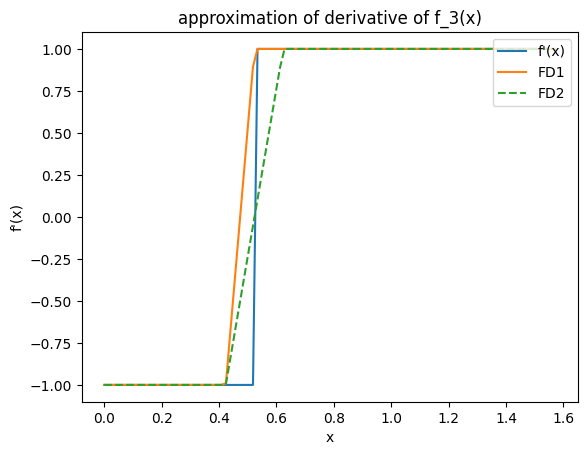

In [22]:
### BEGIN SOLUTION
h=0.1
n=100
x=np.linspace(0,np.pi/2,n+1)
d=fprime(x)
d1=(f(x+h)-f(x))/h
e1=np.linalg.norm(d-d1,np.inf)
d2=(f(x+h)-f(x-h))/(2*h)
e2=np.linalg.norm(d-d2,np.inf)
plt.plot(x,d,label="f'(x)")
plt.plot(x,d1,label="FD1")
plt.plot(x,d2,'--',label="FD2")
plt.legend(loc=1)
plt.xlabel("x")
plt.ylabel("f'(x)")
plt.title("approximation of derivative of f_3(x)")
### END SOLUTION


Draw the error graph

Text(0.5, 1.0, 'error graph for approximation of derivative of f_3')

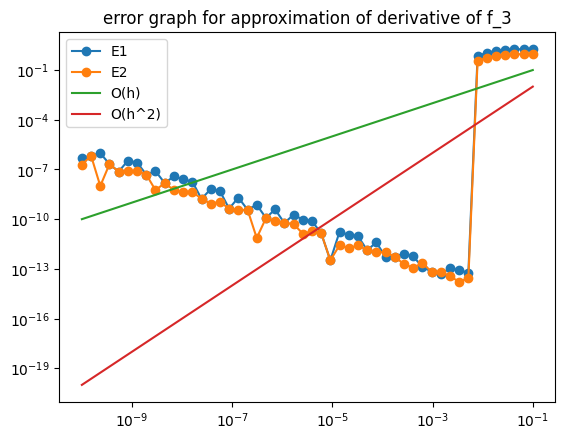

In [23]:
### BEGIN SOLUTION
E1=[]
E2=[]
for h in H:
    e=max_error(h)
    E1.append(e[0])
    E2.append(e[1])
plt.plot(H,E1,"-o",label="E1")
plt.plot(H,E2,"-o",label="E2")
plt.plot(H,H,"-",label="O(h)")
plt.plot(H,H**2,"-",label="O(h^2)")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('error graph for approximation of derivative of f_3')
### END SOLUTION


Interpret the two graphs
### BEGIN SOLUTION
Function $f_3$ is only continuous. Its derivative is discontinuous at $x=\pi/6$ therefore neither approximation behaves correctly.
### END SOLUTION
